# Numerical Solution of Space-Heterogeneous Model

In [1]:
import numpy as np
from numpy.random import normal, uniform

from scipy import sparse
import scipy.stats as stats
from scipy.integrate import simps


from pandas import * #For visualising arrays easily
import time

from plotting_tools import *
from herding import *

import pickle

In [2]:
def particle_model(particle_count=100, D=1, dt=0.01, T_end=1,
                   initial_dist_x=uniform(size = 100),
                   initial_dist_v=uniform(size = 100), G = step_G):
    """
    Returns array of position and velocity after time t
    
    
    
    
    """
    steps = int(T_end/dt)
    v = np.zeros((steps+1, particle_count), dtype = float)
    x = np.zeros((steps+1, particle_count), dtype =float)

    #Initial Condition
    v[0, :] = initial_dist_v
    x[0, :] = initial_dist_x
    for n in range(steps):
        x_curr = x[n, :]
        v_curr = v[n, :]
        x[n+1, :] = (x_curr + v_curr*dt) % (2*np.pi) # Restrict to torus
        v[n+1, :] = (v_curr - v_curr*dt + G(phi_part(v[n, :]))*dt 
                     + np.sqrt(2 * dt * D) * normal(size = particle_count))
    t = np.arange(0, T_end+dt, dt)
    return t, x, v

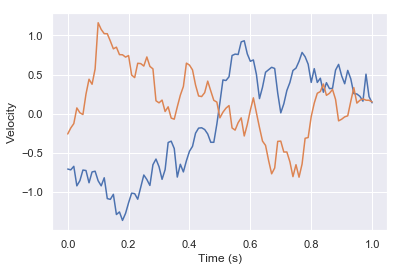

In [34]:
%matplotlib inline

t_1, x_1, v_1 = particle_model(particle_count=100, D=1,
                          initial_dist_x=np.pi/2,
                          initial_dist_v=normal(size=100),
                          dt=0.01, T_end=1, G=step_G)

# test_data = {"Time": t_1,
#              "Position": x_1, 
#              "Velocity": v_1}
# pickle.dump(test_data, open('Test_Data/test_data', "wb"))

t_2, x_2, v_2 = particle_model(particle_count=100, D=1,
                          initial_dist_x=np.pi/2,
                          initial_dist_v=normal(size=100),
                          dt=0.01, T_end=1, G=smooth_G)
plt.plot(t_1, v_1[:,0])
plt.plot(t_2, v_2[:,0])
plt.xlabel('Time (s)')
plt.ylabel('Velocity')
plt.show()

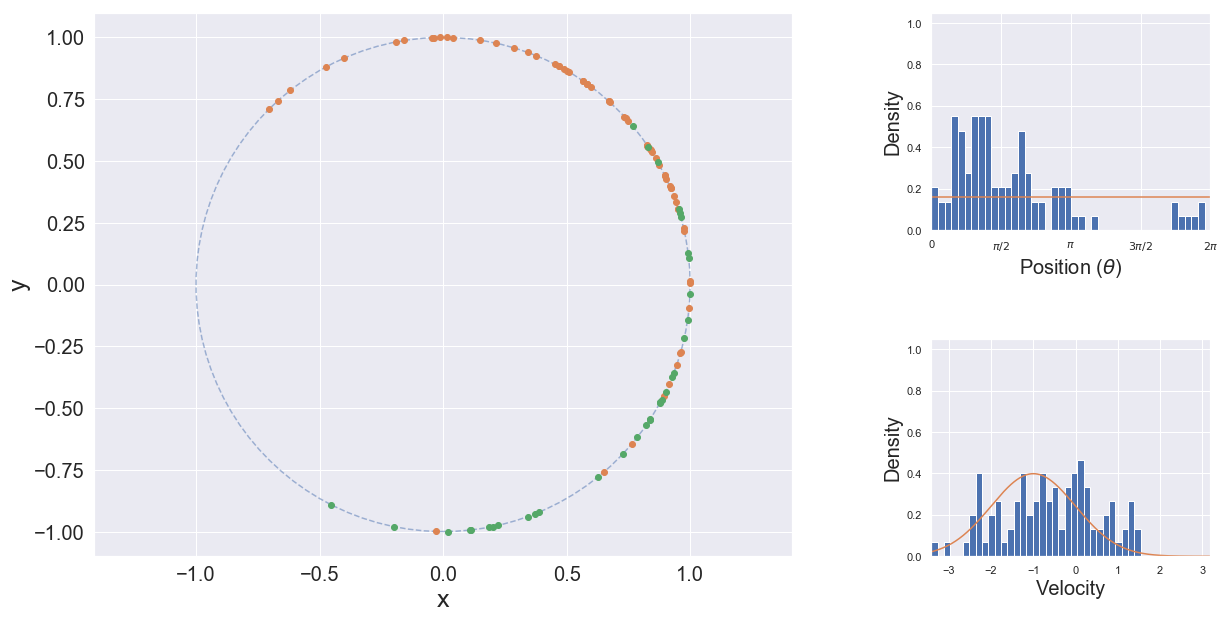

In [35]:
#Must be written twice, bug in Jupyter
%matplotlib qt
%matplotlib qt

plot_together(-1, t_1, x_1, v_1)

In [8]:
%matplotlib qt
ani1  = anim_full(t_1, x_1, v_1)


In [9]:
ani2 = anim_full(t_2, x_2, v_2)

In [10]:
#Saving output as .mp4 (may take a while)
writer = animation.FFMpegWriter(fps = 20, extra_args=['-vcodec', 'libx264'])
ani1.save('1particles.mp4', writer = writer)
animation.FFMpegWriter(fps = 20, extra_args=['-vcodec', 'libx264'])
ani2.save('2particles.mp4', writer = writer)

##### Old Code

For plotting multiple histograms with matplotlib notebook backend as opposed to a separate window - harder to size. May be better for presentation if done in Jupyter?

In [ ]:
# fig.show()
# fig.canvas.draw()

# for i in range(1, len(t)):
#     #Particles
#     pos_vel = [x[i,idx] if vel >= 0 else None for  idx, vel in enumerate(v[i,:])]
#     pos_vel = [x for x in pos_vel if x is not None]
#     neg_vel = [x[i,idx] if vel <= 0 else None for  idx, vel in enumerate(v[i,:])]
#     neg_vel = [x for x in neg_vel if x is not None]
#     pos_points.set_data(np.sin(pos_vel), np.cos(pos_vel))
#     neg_points.set_data(np.sin(neg_vel), np.cos(neg_vel))
#     ####
    
#     n_v, _ = np.histogram(v[i, :],  bins = np.arange(v.min(), v.max(), 0.15), density = True)
#     n_x, _ = np.histogram(x[i, :],  bins = np.arange(x.min(), x.max(), 0.15), density = True)
    
#     #Update vel data
#     for rect_v, height_v in zip(patches_v, n_v):
#           rect_v.set_height(height_v)
#     #Update pos data
#     for rect_x, height_x in zip(patches_x, n_x):
#           rect_x.set_height(height_x)

#     fig.suptitle('t = {:.2f}'.format(t[i]), fontsize = 25)
#     time.sleep(0.05)
#     fig.canvas.draw()
    
    

# for i in range(1, len(t)):
#     n, _ = np.histogram(traj[:,i],  bins = np.arange(traj.min(), traj.max(), 0.15), density = True)
#     fig.suptitle('t = {:.2f}'.format(t[i]))
#     for rect, heig in zip(patches, n):
#          rect.set_height(heig)
#     time.sleep(0.005)
#     fig.canvas.draw()

 

Plots only particle system without histograms

In [ ]:
########OLD ##############
# %matplotlib notebook
# %matplotlib notebook

# fig, ax = plt.subplots(1,1, figsize=(8, 8))

# an = np.linspace(0, 2 * np.pi, 100)
# plt.plot(np.cos(an), np.sin(an),'--', alpha = 0.5)
# ax.axis('equal')
# #plt.ion() #Interactive mode on

# t = np.arange(0, T_end+dt, dt)
# ax.set_ylim(-1.1 ,1.1)
# ax.set_xlim(-1.1 ,1.1)

# #Horrible trick to plot different colours -- look for way to pass color argument in one go
# pos_vel = [x[0,idx] if vel >= 0 else None for  idx, vel in enumerate(v[0,:])]
# pos_vel = [x for x in pos_vel if x is not None]
# neg_vel = [x[0,idx] if vel <= 0 else None for  idx, vel in enumerate(v[0,:])]
# neg_vel = [x for x in neg_vel if x is not None]
# #x and y wrong way round so that +ve vel is clockwise
# pos_points, = ax.plot(np.sin(pos_vel), np.cos(pos_vel), linestyle = 'None', marker = 'o', c='g')
# neg_points, = ax.plot(np.sin(neg_vel), np.cos(neg_vel), linestyle = 'None', marker = 'o', c='r')

# fig.suptitle('t = {}'.format(t[0]), fontsize = 25)

# ax.tick_params(axis='both', which='major', labelsize=20)
# ax.set_xlabel('x', fontsize = 25)
# ax.set_ylabel('y', fontsize = 25)

# fig.show()
# fig.canvas.draw()

# for i in range(1, len(t)):
#     pos_vel = [x[i,idx] if vel >= 0 else None for  idx, vel in enumerate(v[i,:])]
#     pos_vel = [x for x in pos_vel if x is not None]
#     neg_vel = [x[i,idx] if vel <= 0 else None for  idx, vel in enumerate(v[i,:])]
#     neg_vel = [x for x in neg_vel if x is not None]
#     pos_points.set_data(np.sin(pos_vel), np.cos(pos_vel))
#     neg_points.set_data(np.sin(neg_vel), np.cos(neg_vel))
#     #points.set_color(col)
#     fig.suptitle('t = {:.2f}'.format(t[i]), fontsize = 25)
#     time.sleep(0.01)
#     fig.canvas.draw()
####################################################